# Titanic - Machine Learning from Disaster

## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.25,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.28,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.92,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,26.55,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.05,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.00,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.00,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,675,11.72,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.00,C148,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["PassengerId", "Survived", "Name", "Cabin"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 6), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 6), (223,))

### Decision Tree Classifier

In [8]:
from common import functions as func

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# space = dict()
# space['criterion'] = ["gini", "entropy"]
# space['splitter'] = ["best", "random"]
# space['max_depth'] = [n for n in range(20)]
# space['min_samples_split'] = [n for n in range(20)]
# space['min_samples_leaf'] = [n for n in range(20)]

# func.show_best_hyperparameter_optimization(
#     DecisionTreeClassifier(), 
#     space, 
#     X_train, 
#     y_train
# )

**Building, train and predict model**

In [10]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6, 
    min_samples_leaf=3,
    splitter="random")

pipeline = make_pipeline(
    StandardScaler(),
    decision_tree_classifier
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [14]:
featimps = decision_tree_classifier.feature_importances_
pctimps = list(map(lambda fi: round(fi * 100), featimps))

pd.DataFrame({
    "Features": X_train.columns, 
    "Relevance (%)": pctimps
})

,Features,Relevance (%)
0,Pclass,24
1,Sex,51
2,Age,9
3,SibSp,3
4,Parch,3
5,Ticket,9


__Predict and show model result__

In [12]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.76536313 0.82022472 0.78089888 0.79775281 0.83146067]
Mean = 0.80 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[124  10]
 [ 36  53]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       134
           1       0.84      0.60      0.70        89

    accuracy                           0.79       223
   macro avg       0.81      0.76      0.77       223
weighted avg       0.80      0.79      0.79       223

----------------------------------------------------------------------
Accuracy: 0.79
Precicion: 0.84
Sensitivity aka Recall: 0.60
F1-Score: 0.70


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.76
----------------------------------------------------------------------


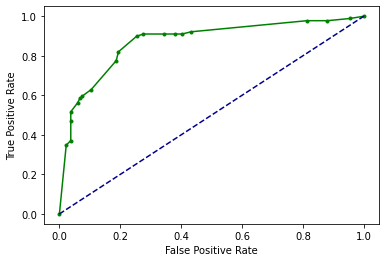

In [13]:
label = "Decision Tree Classifier"
func.show_curve_roc(pipeline, X_test, y_test, y_predict, label=label)